In [1]:
!pip install torch torchvision torchaudio
!pip install easyocr


     |████████████████████████████████| 1.5 MB 4.5 MB/s 
     |████████████████████████████████| 63.2 MB 28.7 MB/s 


In [34]:
import cv2
import numpy as np 
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline


In [35]:
img = 'books/norse.jpg'
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [36]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(img)
result

Using CPU. Note: This module is much faster with a GPU.


[([[215, 50], [720, 50], [720, 199], [215, 199]], 'NORSE', 0.9999701985312016),
 ([[97, 193], [841, 193], [841, 309], [97, 309]],
  'MYTHOLOGY',
  0.9988915629658333),
 ([[101, 1090], [831, 1090], [831, 1128], [101, 1128]],
  'THE COMPLETE GUIDE TO NORSE GODS AND',
  0.860953818442005),
 ([[109, 1128], [823, 1128], [823, 1165], [109, 1165]],
  'VIKING MYTHOLOGY INCLUDING LEGENDS,',
  0.9554636467982293),
 ([[126, 1164], [807, 1164], [807, 1203], [126, 1203]],
  'BELIEFS, HEROES, MYTHS AND FAIRY TALES',
  0.9351344664418813),
 ([[199, 1229], [722, 1229], [722, 1333], [199, 1333]],
  'JOSH DRAKE',
  0.9849195862889094)]

In [37]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_PLAIN

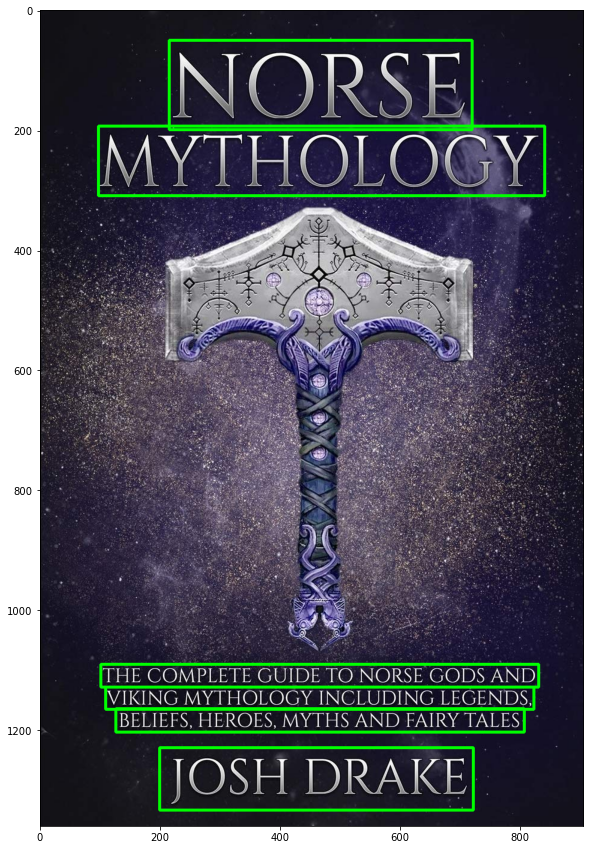

In [38]:
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_PLAIN
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 3)

plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()